In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
import requests
from PIL import Image
import nltk
from nltk.corpus import stopwords
import warnings

In [2]:
df = pd.read_csv("employee_reviews.csv")
df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
# Selected pros and cons column
df=pd.concat([df.company,df.pros,df.cons],axis=1)
df.dropna(axis=0,inplace=True)
df.to_csv("pros_cons.csv")
df.head()

,company,pros,cons
0,google,People are smart and friendly,Bureaucracy is slowing things down
1,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...
2,google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g..."
3,google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...
4,google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv..."


In [4]:
# To get pros and cons of facebook
df.set_index('company',inplace=True)
df.head()

,pros,cons
company,,
google,People are smart and friendly,Bureaucracy is slowing things down
google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...
google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g..."
google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...
google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv..."


In [5]:
facebook_df = df.loc['facebook']
df = facebook_df.reset_index()
df.head()

,company,pros,cons
0,facebook,Context: I worked in operations - Very entrepr...,- Very entrepreneurial culture: There is no fo...
1,facebook,- Incredible benefits - Excellent compensation...,- If you don't learn to make the work life bal...
2,facebook,I'm a 55 year old working in a company where t...,"Like any tech company, the work is big and com..."
3,facebook,Having worked at Facebook for a number of year...,"Particularly as of late, Facebook has been sub..."
4,facebook,Smart people who were chosen to be good to wor...,Took a year and a half to learn to play defens...


In [6]:
pros_list=[]
for i in df.pros:
    text=re.sub("[^a-zA-Z]"," ",i) # changing character with space
    text=text.lower()
    text=nltk.word_tokenize(text) # tokenization of the words
    lemma=nltk.WordNetLemmatizer() 
    text=[lemma.lemmatize(word) for word in text] # lemmatization, to convert words to their root format 
    text=" ".join(text)
    pros_list.append(text)
pros_list[:3]

['context i worked in operation very entrepreneurial culture you re encouraged to build system process to accomplish what you need the perk are great very collaborative environment giving and receiving honest constructive feedback is a huge part of the culture there is a lot of room for growth career conversation are encouraged',
 'incredible benefit excellent compensation that reward strong performance lot of autonomy ton of room for growth very transparent from the top down strong leadership intelligent and caring colleague the most fair and well thought out review process you will find everywhere exciting work',
 'i m a year old working in a company where the average age is and i ve never been happier i have always wanted to work in a company where i wasn t the proverbial square peg and after nearly year in the work force i believe that i have found the company that complement my ideology for how a company should operate here are the pro a i see them leadership mark zuckerberg shery

In [7]:
# bag of words, removing irrelevant words
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(pros_list).toarray() # convert text to array forms
all_words=cou_vec.get_feature_names()
print("Most used words: ",all_words[50:100])

Most used words:  ['adaptive', 'add', 'added', 'addition', 'address', 'adjust', 'adjustment', 'administrator', 'admins', 'admirable', 'admire', 'admired', 'admit', 'admitting', 'adopted', 'adoption', 'adult', 'advance', 'advancement', 'advantage', 'advertiser', 'advertising', 'advice', 'adviseable', 'advocate', 'affect', 'affecting', 'afraid', 'afternoon', 'age', 'agency', 'agenda', 'aggressive', 'aggressively', 'agile', 'agility', 'ago', 'agree', 'ahead', 'ai', 'aid', 'aide', 'aiming', 'air', 'airplane', 'aka', 'alarming', 'alcohol', 'algorithm', 'align']


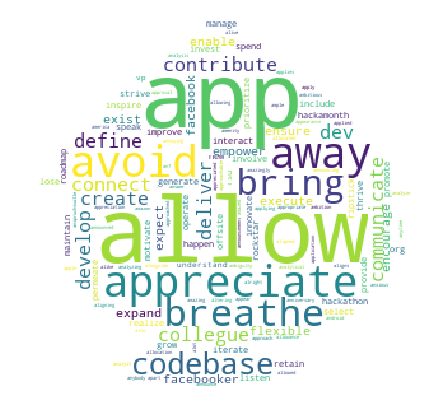

In [8]:
# Generate wordcloud of pros comment on facebook
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/f/1/5/0/1194985571905910902pinkhome2.svg.med.png', stream=True).raw))
wordcloud=WordCloud(background_color="white",mask=mask, width=1000,height=700).generate(" ".join(all_words[100:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:

cons_list=[]
for i in df.cons:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    cons_list.append(text)
cons_list[:2]

['very entrepreneurial culture there is no formal facebook way of doing thing so work environment can be too unstructured at time open floor plan can be distracting',
 'if you don t learn to make the work life balance work for you it can be exhausting but you ll also be given lot of support with this if you ask for it it doesn t matter how good you are at your job chance are you re going to be surrounded by a ton of other people who are just a good if not better imposter syndrome is real but if you got an offer you probably belong here too']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(cons_list).toarray()
cons_words=cou_vec.get_feature_names()
print("Most used words: ",cons_words[50:100])

Most used words:  ['actual', 'actually', 'ad', 'adapt', 'adaptable', 'add', 'added', 'addicted', 'adding', 'additional', 'additionally', 'address', 'addressed', 'adequate', 'adjust', 'adjusted', 'adjusting', 'admin', 'administrative', 'admins', 'adminstrators', 'admirable', 'admire', 'admit', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'advertiser', 'advertising', 'advice', 'advise', 'advocate', 'aetna', 'affect', 'affected', 'affecting', 'affirmation', 'afford', 'afloat', 'afraid', 'afters', 'age', 'aged', 'agency', 'aggressive', 'agile', 'agility', 'ago']


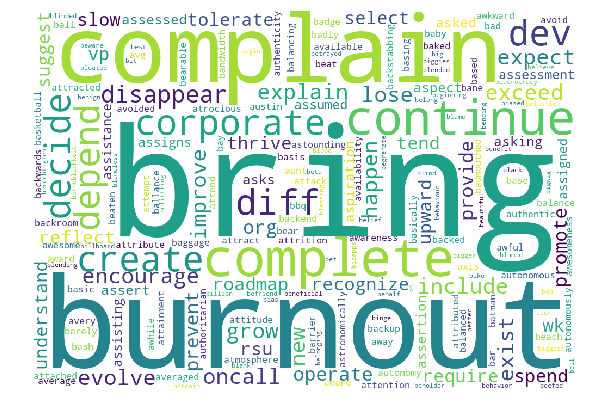

In [11]:
# to generate wordcloud of cons reviews.
from wordcloud import WordCloud
plt.figure(figsize=(10,7))
wordcloud=WordCloud(background_color="white",width=1000, height=700).generate(" ".join(cons_words[200:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()